# **PROBLEM STATEMENT 3:**

## Multilingual Abusive Comment Detection: Given a comment, detect whether it is abusive or not

## **Load the Dataset**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import time 
#for uploading data to csv
import re 
import string
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import collections
from wordcloud import WordCloud

In [ ]:
url='https://drive.google.com/file/d/1hKVwztucurF9Fw3UvzpWtU-13XoqSZlN/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url, error_bad_lines=False)
print(df.head())

b'Skipping line 51: expected 9 fields, saw 14\nSkipping line 254: expected 9 fields, saw 11\nSkipping line 923: expected 9 fields, saw 10\nSkipping line 1046: expected 9 fields, saw 11\nSkipping line 1420: expected 9 fields, saw 13\nSkipping line 1603: expected 9 fields, saw 10\nSkipping line 1729: expected 9 fields, saw 10\nSkipping line 1968: expected 9 fields, saw 10\nSkipping line 2618: expected 9 fields, saw 10\nSkipping line 2827: expected 9 fields, saw 10\nSkipping line 3459: expected 9 fields, saw 10\nSkipping line 3707: expected 9 fields, saw 10\nSkipping line 3935: expected 9 fields, saw 13\nSkipping line 4153: expected 9 fields, saw 13\nSkipping line 4676: expected 9 fields, saw 10\nSkipping line 4919: expected 9 fields, saw 10\nSkipping line 5626: expected 9 fields, saw 10\nSkipping line 6334: expected 9 fields, saw 15\nSkipping line 7326: expected 9 fields, saw 11\nSkipping line 7535: expected 9 fields, saw 15\nSkipping line 7789: expected 9 fields, saw 10\nSkipping line 7

   CommentId                 commentText  ... like_count_comment  like_count_post
0          0                     🤬🤬🤬🤬🤬🤬🤬  ...                0.0             40.0
1          1            चुड़ैल भूत प्रेत  ...                0.0            190.0
2          2      74537627501 randi kala  ...                0.0             99.0
3          3  சரி வர்சா ஐபீவா பேசனு உன்ட  ...                0.0             45.0
4          4        "gulabchandnainaihi"  ...                0.0            122.0

[5 rows x 9 columns]


In [ ]:
df

,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post
0,0,🤬🤬🤬🤬🤬🤬🤬,Assamese,154.0,113314.0,0.0,0.0,0.0,40.0
1,1,चुड़ैल भूत प्रेत,Rajasthani,3836.0,235816.0,0.0,1.0,0.0,190.0
2,2,74537627501 randi kala,Assamese,366.0,351524.0,0.0,0.0,0.0,99.0
3,3,சரி வர்சா ஐபீவா பேசனு உன்ட,Assamese,3046.0,789690.0,0.0,0.0,0.0,45.0
4,4,"""gulabchandnainaihi""",Rajasthani,4282.0,925495.0,0.0,0.0,0.0,122.0
...,...,...,...,...,...,...,...,...,...
126208,128333,4614608105 akshara,Kannada,69389.0,75803.0,0.0,3.0,2.0,312.0
126209,128334,💖💞🧡🥰,Kannada,52410.0,488044.0,0.0,1.0,0.0,325.0
126210,128335,party akka is my favorite 👑👑👑👑👑👑👑👑👑👑💍💍💍💍💍🥰😍🥰😘😘😘😘😘,Kannada,10426.0,629616.0,0.0,0.0,0.0,190.0
126211,128336,super. akk,Kannada,44019.0,964579.0,0.0,1.0,1.0,214.0


In [ ]:
test=df

In [ ]:
link = 'https://drive.google.com/file/d/1qrABwBtS-OeQz-RzWejYe18uUyG9Y1_7/view?usp=sharing' # The shareable link
id='1qrABwBtS-OeQz-RzWejYe18uUyG9Y1_7'
print (id) # Verify that you have everything after '='

1qrABwBtS-OeQz-RzWejYe18uUyG9Y1_7


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ShareChat-IndoML-Datathon-NSFW-CommentChallenge_Train.csv')  
df3 = pd.read_csv('ShareChat-IndoML-Datathon-NSFW-CommentChallenge_Train.csv',error_bad_lines=False)
# Dataset is now stored in a Pandas Dataframe

b'Skipping line 446: expected 10 fields, saw 13\nSkipping line 614: expected 10 fields, saw 11\nSkipping line 2576: expected 10 fields, saw 13\nSkipping line 2762: expected 10 fields, saw 18\nSkipping line 3384: expected 10 fields, saw 11\nSkipping line 3831: expected 10 fields, saw 11\nSkipping line 3892: expected 10 fields, saw 12\nSkipping line 4037: expected 10 fields, saw 11\nSkipping line 4042: expected 10 fields, saw 12\nSkipping line 4739: expected 10 fields, saw 16\nSkipping line 4846: expected 10 fields, saw 11\nSkipping line 5306: expected 10 fields, saw 11\nSkipping line 6271: expected 10 fields, saw 16\nSkipping line 7853: expected 10 fields, saw 11\nSkipping line 8970: expected 10 fields, saw 11\nSkipping line 9937: expected 10 fields, saw 16\nSkipping line 10511: expected 10 fields, saw 13\nSkipping line 11199: expected 10 fields, saw 11\nSkipping line 11455: expected 10 fields, saw 11\nSkipping line 11711: expected 10 fields, saw 11\nSkipping line 11785: expected 10 fie

In [ ]:
train=df3
train

,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post,label
0,0,randi ka deewana,Assamese,2869,175913,0,1,0,65,1.0
1,1,👌👌🙏🥰🥰🥰☝️☝️,Rajasthani,601,960582,0,0,1,94,0.0
2,2,apni pant utar kar apni chut bhi to bata do ma...,Urdu,1205,17327,0,1,0,731,1.0
3,3,krishnatripathi4578 jesi ghar ki sabhyata vais...,Rajasthani,889,352919,0,1,1,285,0.0
4,4,is randi ko dusra kaam nahi hai kuttiya kahin ki,Urdu,372,261223,0,0,0,453,1.0
...,...,...,...,...,...,...,...,...,...,...
1483501,1500893,pavam🤣 😁😻😻😻😻,Malayalam,7201,661099,0,0,1,28,0.0
1483502,1500894,enik ind post ittittila 😔,Malayalam,16000,905283,0,0,2,28,0.0
1483503,1500895,nirmelp34 parayilla,Malayalam,10028,339564,0,0,0,28,0.0
1483504,1500896,ettan🙈😘,Malayalam,5552,397363,0,0,2,28,0.0


## **Data Visualization**

In [ ]:
import functools
import operator
import string

In [ ]:
import nltk
import numpy as np
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['TextLength']=df['commentText'].apply(lambda x:len(str(x)))

In [ ]:
df

,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post,TextLength,LanguageEn
0,0,🤬🤬🤬🤬🤬🤬🤬,Assamese,154.0,113314.0,0.0,0.0,0.0,40.0,7,0
1,1,चुड़ैल भूत प्रेत,Rajasthani,3836.0,235816.0,0.0,1.0,0.0,190.0,16,6
2,2,74537627501 randi kala,Assamese,366.0,351524.0,0.0,0.0,0.0,99.0,22,0
3,3,சரி வர்சா ஐபீவா பேசனு உன்ட,Assamese,3046.0,789690.0,0.0,0.0,0.0,45.0,26,0
4,4,"""gulabchandnainaihi""",Rajasthani,4282.0,925495.0,0.0,0.0,0.0,122.0,21,6
...,...,...,...,...,...,...,...,...,...,...,...
126208,128333,4614608105 akshara,Kannada,69389.0,75803.0,0.0,3.0,2.0,312.0,18,4
126209,128334,💖💞🧡🥰,Kannada,52410.0,488044.0,0.0,1.0,0.0,325.0,4,4
126210,128335,party akka is my favorite 👑👑👑👑👑👑👑👑👑👑💍💍💍💍💍🥰😍🥰😘😘😘😘😘,Kannada,10426.0,629616.0,0.0,0.0,0.0,190.0,49,4
126211,128336,super. akk,Kannada,44019.0,964579.0,0.0,1.0,1.0,214.0,10,4


Label encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df["LanguageEn"] = le.fit_transform(df["language"])
df.head()

,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post,TextLength,LanguageEn
0,0,🤬🤬🤬🤬🤬🤬🤬,Assamese,154.0,113314.0,0.0,0.0,0.0,40.0,7,0
1,1,चुड़ैल भूत प्रेत,Rajasthani,3836.0,235816.0,0.0,1.0,0.0,190.0,16,6
2,2,74537627501 randi kala,Assamese,366.0,351524.0,0.0,0.0,0.0,99.0,22,0
3,3,சரி வர்சா ஐபீவா பேசனு உன்ட,Assamese,3046.0,789690.0,0.0,0.0,0.0,45.0,26,0
4,4,"""gulabchandnainaihi""",Rajasthani,4282.0,925495.0,0.0,0.0,0.0,122.0,21,6


In [ ]:
df1 = df[['language','LanguageEn']]
df1

,language,LanguageEn
0,Assamese,0
1,Rajasthani,6
2,Assamese,0
3,Assamese,0
4,Rajasthani,6
...,...,...
126208,Kannada,4
126209,Kannada,4
126210,Kannada,4
126211,Kannada,4


In [ ]:
font1 = {'family':'serif','size':30,'weight': 'bold'}
font2 = {'family':'serif','size':25}
font3 = {'family':'serif','size':15}
textprops = {"fontsize":15}

In [ ]:
a=['Hindi','English', 'Malayalam','Telugu','Tamil','Punjabi','Kannada','Bengali','Odia', 'Bhojpuri','Marathi','Gujarati','Haryanvi','Rajasthani','Assamese','Urdu']

In [ ]:
train = train[train['language'].isin(a)]

In [ ]:
print(train['language'].value_counts())

Hindi         493264
English       173508
Malayalam     160954
Telugu        145620
Tamil         126561
Punjabi       101894
Kannada        80749
Bengali        46507
Odia           37650
Bhojpuri       37545
Marathi        30673
Gujarati       23405
Haryanvi       13048
Rajasthani      5159
Assamese        3564
Urdu            3186
Name: language, dtype: int64


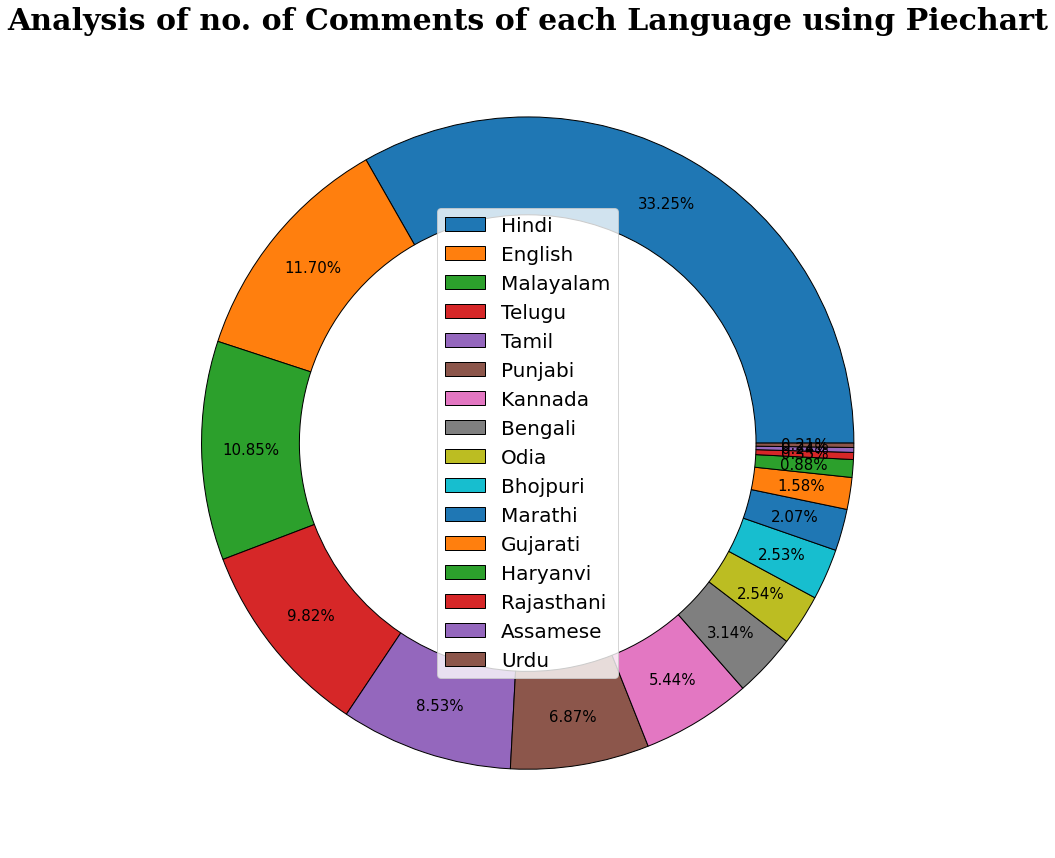

In [ ]:
fig, ax = plt.subplots(figsize = (20,15))
size = 0.3
ax.pie(train['language'].value_counts(), wedgeprops=dict(width=size, edgecolor='k'), autopct='%1.2f%%', pctdistance=0.85, labeldistance=1, textprops =textprops)
plt.legend(train['language'].value_counts().index, loc="center", prop={'size': 20})
ax.set_title("Analysis of no. of Comments of each Language using Piechart", fontdict=font1)
plt.show()
fig.savefig("Analysis of no. of Comments of each Language using Piechart.pdf", format='pdf')

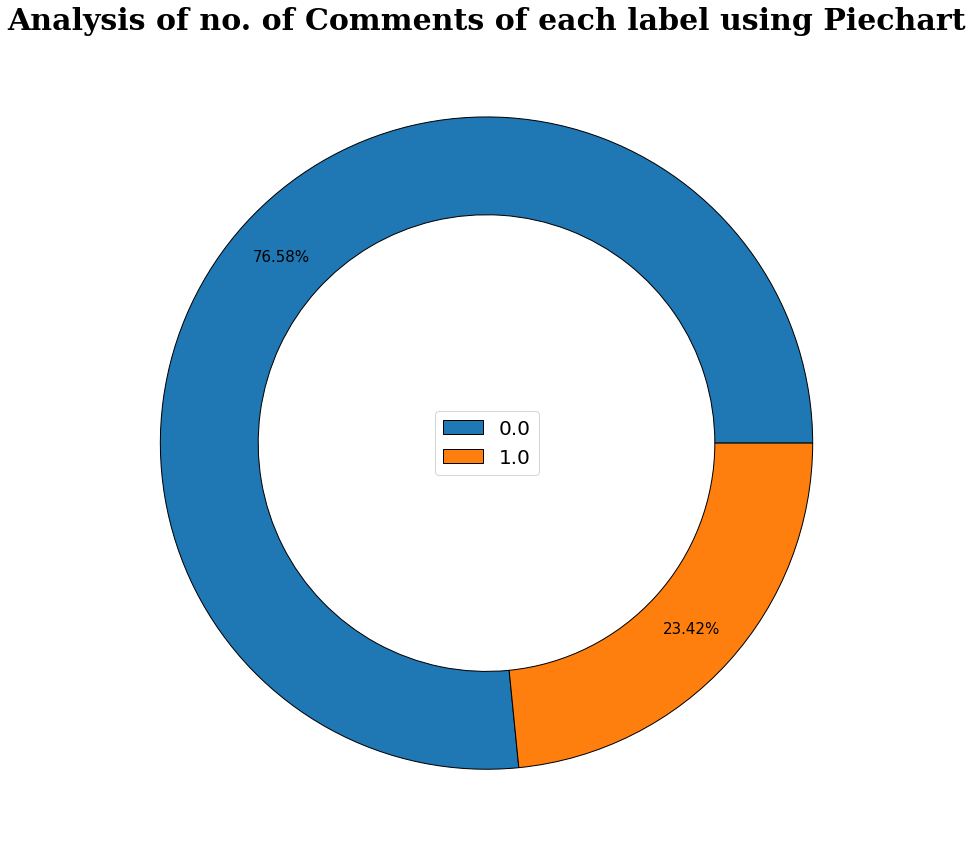

In [ ]:
fig, ax = plt.subplots(figsize = (20,15))
size = 0.3
ax.pie(train['label'].value_counts(), wedgeprops=dict(width=size, edgecolor='k'), autopct='%1.2f%%', pctdistance=0.85, labeldistance=1, textprops =textprops)
plt.legend(train['label'].value_counts().index, loc="center", prop={'size': 20})
ax.set_title("Analysis of no. of Comments of each label using Piechart", fontdict=font1)
plt.show()
fig.savefig("Analysis of no. of Comments of each label using Piechart.pdf", format='pdf')

pyplot : no. of abusive comments vs reported comments


In [ ]:
print(df['report_count_comment'].value_counts())

0.0    125793
1.0       386
2.0         8
4.0         1
Name: report_count_comment, dtype: int64


##Label Encoding Language

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dfVis=train.copy()
dfVis["languageEn"] = le.fit_transform(dfVis["language"])
dfVis.head()

,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post,label,languageEn
0,0,randi ka deewana,Assamese,2869,175913,0,1,0,65,1.0,0
1,1,👌👌🙏🥰🥰🥰☝️☝️,Rajasthani,601,960582,0,0,1,94,0.0,12
2,2,apni pant utar kar apni chut bhi to bata do ma...,Urdu,1205,17327,0,1,0,731,1.0,15
3,3,krishnatripathi4578 jesi ghar ki sabhyata vais...,Rajasthani,889,352919,0,1,1,285,0.0,12
4,4,is randi ko dusra kaam nahi hai kuttiya kahin ki,Urdu,372,261223,0,0,0,453,1.0,15


In [ ]:
df1 = dfVis[['language','languageEn']]
df1

,language,languageEn
0,Assamese,0
1,Rajasthani,12
2,Urdu,15
3,Rajasthani,12
4,Urdu,15
...,...,...
1483501,Malayalam,8
1483502,Malayalam,8
1483503,Malayalam,8
1483504,Malayalam,8


In [ ]:
dfVis['Comment_length']=dfVis['commentText'].apply(lambda x:len(str(x)))

In [ ]:
dfVis.head()

,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post,label,languageEn,Comment_length
0,0,randi ka deewana,Assamese,2869,175913,0,1,0,65,1.0,0,16
1,1,👌👌🙏🥰🥰🥰☝️☝️,Rajasthani,601,960582,0,0,1,94,0.0,12,10
2,2,apni pant utar kar apni chut bhi to bata do ma...,Urdu,1205,17327,0,1,0,731,1.0,15,68
3,3,krishnatripathi4578 jesi ghar ki sabhyata vais...,Rajasthani,889,352919,0,1,1,285,0.0,12,55
4,4,is randi ko dusra kaam nahi hai kuttiya kahin ki,Urdu,372,261223,0,0,0,453,1.0,15,48


Finding Correlation Between Language , Comment length , No. of reports between comment, No. of reports on post , like_count_comment , like_count_post and label

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
df1=dfVis.copy()

In [ ]:
df1.head()

,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post,label,languageEn,Comment_length
0,0,randi ka deewana,Assamese,2869,175913,0,1,0,65,1.0,0,16
1,1,👌👌🙏🥰🥰🥰☝️☝️,Rajasthani,601,960582,0,0,1,94,0.0,12,10
2,2,apni pant utar kar apni chut bhi to bata do ma...,Urdu,1205,17327,0,1,0,731,1.0,15,68
3,3,krishnatripathi4578 jesi ghar ki sabhyata vais...,Rajasthani,889,352919,0,1,1,285,0.0,12,55
4,4,is randi ko dusra kaam nahi hai kuttiya kahin ki,Urdu,372,261223,0,0,0,453,1.0,15,48


In [ ]:
del df1['CommentId']
del df1['commentText']
del df1['language']
#del df1['languageEn']
del df1['user_index']
del df1['post_index']
#del df1['like_count_comment']
del df1['like_count_post']
#del df1['report_count_comment']
del df1['report_count_post']
#del df1['Comment_length']
del df1['languageEn']


In [ ]:
# Replacing infinite with nan
df1.replace([np.inf, -np.inf], np.nan, inplace=True)

# Dropping all the rows with nan values
df1.dropna(inplace=True)

# Printing df
df1.head()



,report_count_comment,like_count_comment,label,Comment_length
0,0,0,1.0,16
1,0,1,0.0,10
2,0,0,1.0,68
3,0,1,0.0,55
4,0,0,1.0,48


In [ ]:
df1['report_count_comment']=df1['report_count_comment'].astype(int)
df1['like_count_comment']=df1['like_count_comment'].astype(int)
#df1['languageEn']=df1['languageEn'].astype(int)
df1['Comment_length']=df1['Comment_length'].astype(int)

In [ ]:
corr = df1.corr()
corr.style.background_gradient(cmap='Pastel2')

,report_count_comment,like_count_comment,label,Comment_length
report_count_comment,1.000000,0.118277,-0.008248,0.012688
like_count_comment,0.118277,1.000000,-0.073679,0.027499
label,-0.008248,-0.073679,1.000000,0.159575
Comment_length,0.012688,0.027499,0.159575,1.000000


This plot suggests that the reported comments are the ones which are given more likes and it also sugeests the fact that the llabel is strongly related to the comment length

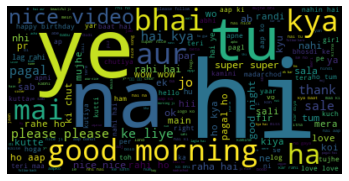

In [ ]:
normal=" ".join(dfVis[dfVis["language"]=="Hindi"]["commentText"].values).lower()
wordcloud = WordCloud().generate(normal)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

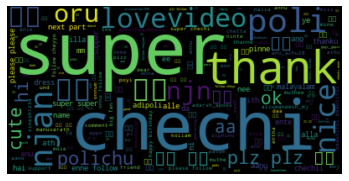

In [ ]:
normal=" ".join(dfVis[dfVis["language"]=="Malayalam"]["commentText"].values).lower()
wordcloud = WordCloud().generate(normal)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

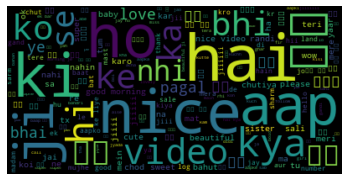

In [ ]:
normal=" ".join(dfVis[dfVis["language"]=="Rajasthani"]["commentText"].values).lower()
wordcloud = WordCloud().generate(normal)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

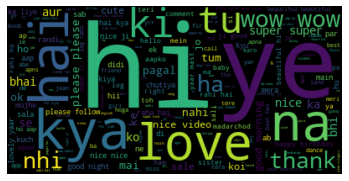

In [ ]:
normal=" ".join(dfVis[dfVis["language"]=="English"]["commentText"].values).lower()
wordcloud = WordCloud().generate(normal)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
dfVis['report_count_comment']=dfVis['report_count_comment'].astype(int)
dfVis['like_count_comment']=dfVis['like_count_comment'].astype(int)
#train2['languageEn']=train2['languageEn'].astype(int)
#train2['Comment_length']=train2['Comment_length'].astype(int)
dfVis['post_index']=dfVis['post_index'].astype(int)
dfVis['user_index']=dfVis['user_index'].astype(int)
dfVis['report_count_post']=dfVis['report_count_post'].astype(int)
dfVis['like_count_post']=dfVis['like_count_post'].astype(int)
dfVis['label']=dfVis['label'].astype(int)
dfVis.replace([np.inf, -np.inf], np.nan, inplace=True)

# Dropping all the rows with nan values
dfVis.dropna(inplace=True)

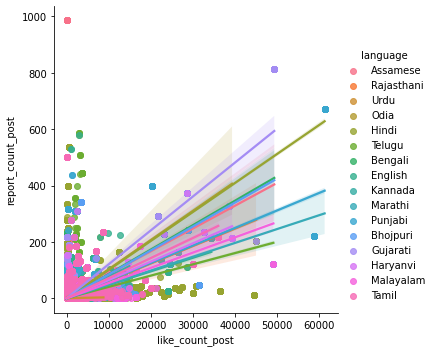

In [ ]:
sns.lmplot(x='like_count_post', y="report_count_post",hue='language' ,data=dfVis)

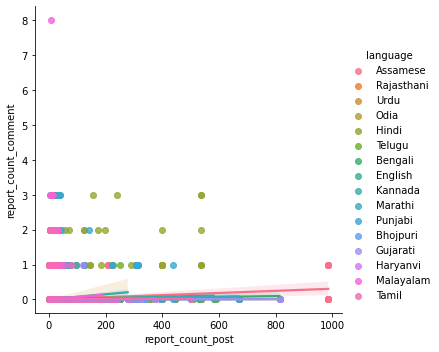

In [ ]:
sns.lmplot(x='report_count_post', y="report_count_comment",hue='language' ,data=dfVis)

### PLOTS BY ABHIGYA

In [ ]:
train.head()

,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post,label
0,0,randi ka deewana,Assamese,2869,175913,0,1,0,65,1.0
1,1,👌👌🙏🥰🥰🥰☝️☝️,Rajasthani,601,960582,0,0,1,94,0.0
2,2,apni pant utar kar apni chut bhi to bata do ma...,Urdu,1205,17327,0,1,0,731,1.0
3,3,krishnatripathi4578 jesi ghar ki sabhyata vais...,Rajasthani,889,352919,0,1,1,285,0.0
4,4,is randi ko dusra kaam nahi hai kuttiya kahin ki,Urdu,372,261223,0,0,0,453,1.0


In [ ]:
train.columns

Index(['CommentId', 'commentText', 'language', 'user_index', 'post_index',
       'report_count_comment', 'report_count_post', 'like_count_comment',
       'like_count_post', 'label'],
      dtype='object')

In [ ]:
train=train.drop(['CommentId','commentText', 'user_index', 'post_index',
       'report_count_comment', 'report_count_post', 'like_count_comment',
       'like_count_post'], axis = 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

one_hot_encoded_data = pd.get_dummies(train, columns = ['label'])
(one_hot_encoded_data)

,language,label_0.0,label_1.0
0,Assamese,0,1
1,Rajasthani,1,0
2,Urdu,0,1
3,Rajasthani,1,0
4,Urdu,0,1
...,...,...,...
1483501,Malayalam,1,0
1483502,Malayalam,1,0
1483503,Malayalam,1,0
1483504,Malayalam,1,0


In [ ]:
newdf=one_hot_encoded_data.groupby('language').sum()
type(newdf)

pandas.core.frame.DataFrame

In [ ]:
newdf=newdf.add_suffix('_Count').reset_index()
newdf = newdf.rename(columns = {'language': 'language', 'label_0.0_Count': 'Non Abusive Comments','label_1.0_Count':'Abusive Comments'}, inplace = False)

In [ ]:
newdf

,language,Non Abusive Comments,Abusive Comments
0,Assamese,3038.0,526.0
1,Bengali,34864.0,11643.0
2,Bhojpuri,25669.0,11876.0
3,English,134866.0,38642.0
4,Gujarati,17833.0,5572.0
5,Haryanvi,9298.0,3750.0
6,Hindi,325903.0,167361.0
7,Kannada,73546.0,7203.0
8,Malayalam,155863.0,5091.0
9,Marathi,20779.0,9894.0


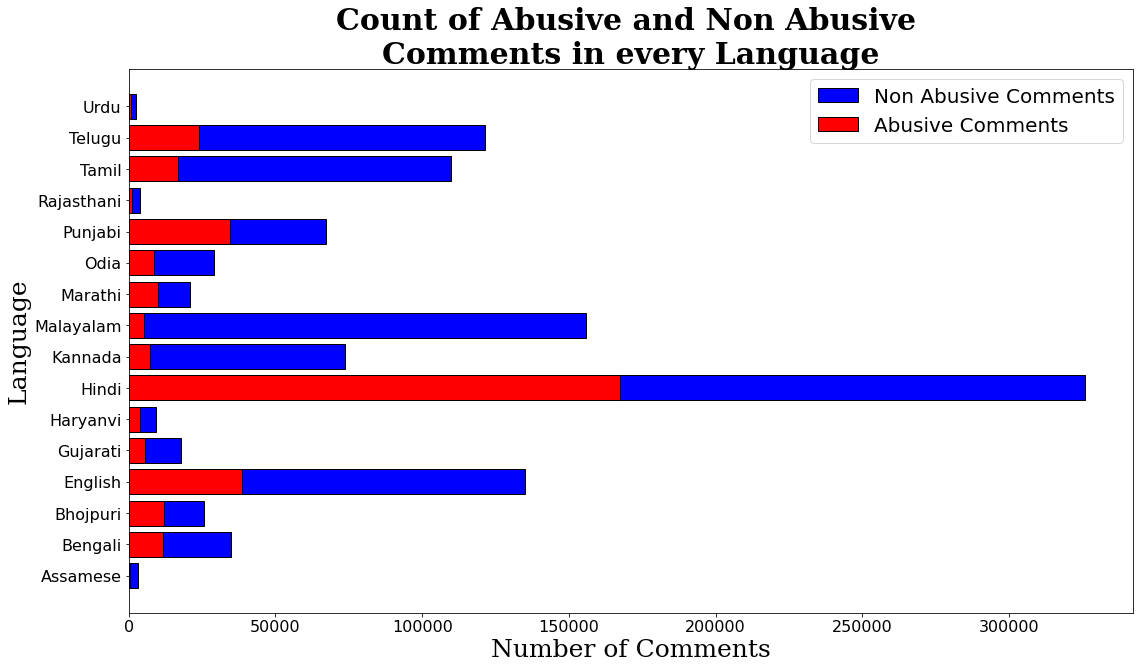

In [ ]:
fig, ax = plt.subplots(figsize = (18,10))
font1 = {'family':'serif','size':30,'weight': 'bold'}
font2 = {'family':'serif','size':25}
font3 = {'family':'serif','size':15}
ax.barh(x, y1, color='b', align='center', edgecolor = 'black', label='Non Abusive Comments')
ax.barh(x, y2, color='r', align='center', edgecolor = 'black',label='Abusive Comments')
ax.set_xlabel("Number of Comments", fontdict = font2)
ax.set_ylabel("Language", fontdict = font2)
ax.set_title("Count of Abusive and Non Abusive \nComments in every Language", fontdict = font1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(prop={'size': 20})
plt.show()

In [ ]:
df3.head()

,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post,label
0,0,randi ka deewana,Assamese,2869,175913,0,1,0,65,1.0
1,1,👌👌🙏🥰🥰🥰☝️☝️,Rajasthani,601,960582,0,0,1,94,0.0
2,2,apni pant utar kar apni chut bhi to bata do ma...,Urdu,1205,17327,0,1,0,731,1.0
3,3,krishnatripathi4578 jesi ghar ki sabhyata vais...,Rajasthani,889,352919,0,1,1,285,0.0
4,4,is randi ko dusra kaam nahi hai kuttiya kahin ki,Urdu,372,261223,0,0,0,453,1.0


In [ ]:
df3=df3.drop(['CommentId','commentText', 'user_index', 'post_index',
       'report_count_comment','label','like_count_comment','like_count_post'], axis = 1)

In [ ]:
df3

,language,report_count_post
0,Assamese,1
1,Rajasthani,0
2,Urdu,1
3,Rajasthani,1
4,Urdu,0
...,...,...
1483501,Malayalam,0
1483502,Malayalam,0
1483503,Malayalam,0
1483504,Malayalam,0


In [ ]:
df3=df3.groupby('language').sum()
df3